### INTRODUCTION
This project aims to help and guide SyriaTel on predicting the patterns that leads to customers churn. By doing so, SyriaTel will be able to manimize the losses incured due to the customers that don't still around for long. At the end, with the predictions SyriaTel will be able to make better decisions based on the final recomendations derived from the in depth Data analysis.

 ## Data Understanding

 * state - the state the user lives in
 * account length - the number of days the user has this account
 * area code - the code of the area the user lives in
 * phone number - the phone number of the user
 * international plan - true if the user has the international plan, otherwise false
 * voice mail plan - true if the user has the voice mail plan, otherwise false
 * number vmail messages - the number of voice mail messages the user has sent
 * total day minutes - total number of minutes the user has been in calls during the day
 * total day calls - total number of calls the user has done during the day
 * total day charge - total amount of money the user was charged by the Telecom company for calls during the day
 * total eve minutes - total number of minutes the user has been in calls during the evening
 * total eve calls - total number of calls the user has done during the evening
 * total night minutes - total number of minutes the user has been in calls during the night
 * total night calls - total number of calls the user has done during the night
 * total night charge - total amount of money the user was charged by the Telecom company for calls during the night
 * total intl minutes - total number of minutes the user has been in international calls
 * total intl calls - total number of international calls the user has done
 * total intl charge - total amount of money the user was charged by the Telecom company for international calls
 * customer service calls - number of customer service calls the user has done
 * churn - true if the user terminated the contract, otherwise false

### Loading Data

In [27]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [28]:
# loading and reading into the data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [29]:
# checking the columns and the info
print(df.columns)
print(df.info())

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null  

### Data cleaning

In [30]:
# checking the missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [31]:
def duplicates(data=df):
    # Checking for duplicates
    duplicates = df.duplicated().sum()
    
    print(f' {duplicates}')
    print(f' {round(duplicates/len(df) * 100, 2)}% of the total data is duplicates.')


duplicates(df)



 0
 0.0% of the total data is duplicates.


In [32]:
#checking for extraneous values to make sure there is no more missing data or unknown characters 
for col in df.columns:
    print(col,'\n', df[col].value_counts(normalize=True),'\n\n')

state 
 WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
OH    0.023402
WI    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
MI    0.021902
VT    0.021902
ID    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NJ    0.020402
MT    0.020402
NC    0.020402
WA    0.019802
CO    0.019802
NV    0.019802
MA    0.019502
RI    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ND    0.018602
NM    0.018602
ME    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64 


account length 
 105    0.012901
87     0.012601
93     0.012001
101    0.012001
90     0.011701
         ...   
191    0.000300
199    0.000300
215    0.000300
221    0.000300
2      0.000300
Nam

In [33]:
#checking the data description
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


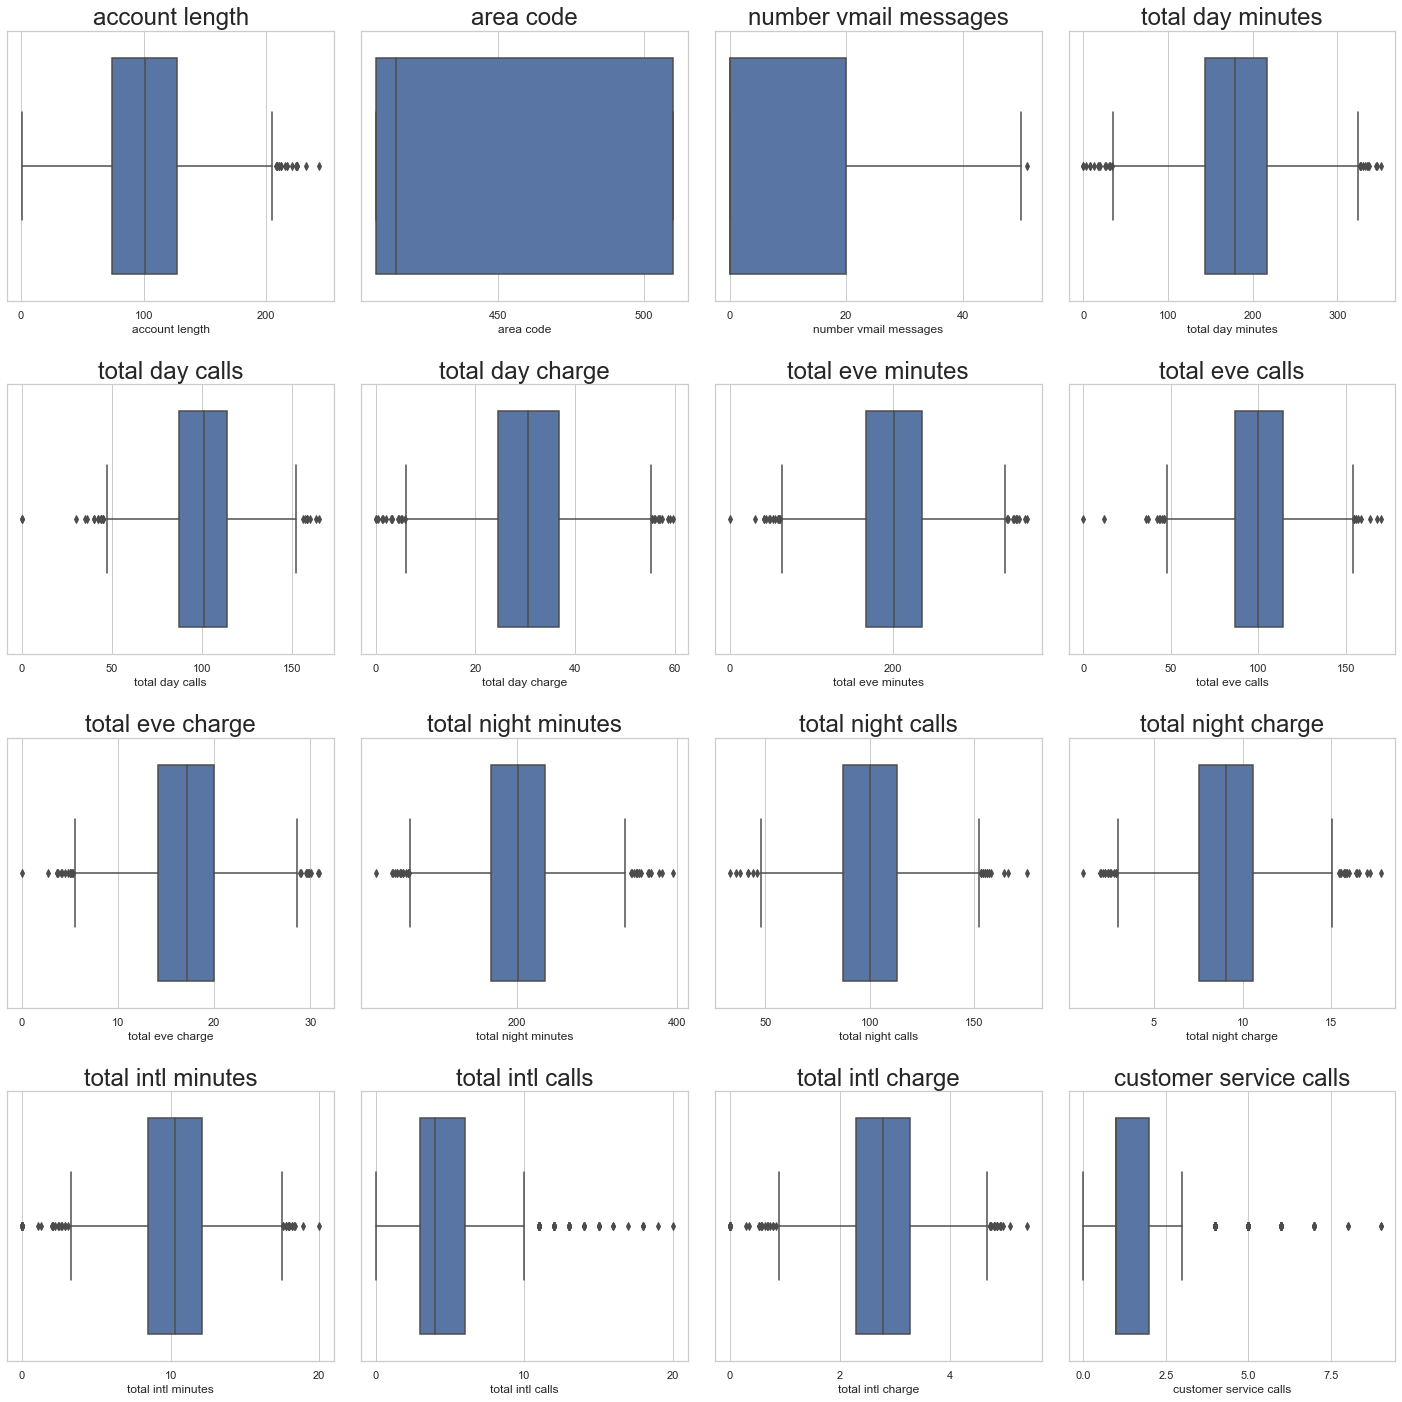

In [34]:
# checking and visualizing outliers 

def plot_boxplots(df, cols):
    fig, axes = plt.subplots(4, 4, figsize=(20,20))
    axes = axes.ravel()
    sns.set(font_scale=2.0)
    for i, col in enumerate(cols):

        # converting the x-axis variable to a numeric data type
        
        df[col] = df[col].astype(float)
        sns.boxplot(x=df[col], ax=axes[i])
        
        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = ['account length', 'area code','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

plot_boxplots(df, cols)

 ### EDA

 ### EDA guiding questions 
  - Is there a relationship between people with the least total charges and churn rate?
  - Does the customer service calls rate affect the chance of churning?
  - What is the relationship between account length have with the churn rate?
  - Does the area code affect the churn rate?
  - The effects of total minutes with to the churn rate.
  - International total usage compared to the churn rates.

In [35]:
# import the necesary sklearn libraries
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [36]:
fig= px.histogram(df, x='churn', color='churn', nbins=10, title='Histogram')

fig.show()

In [37]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

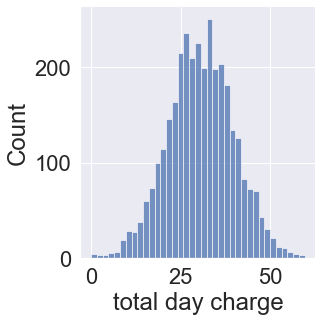

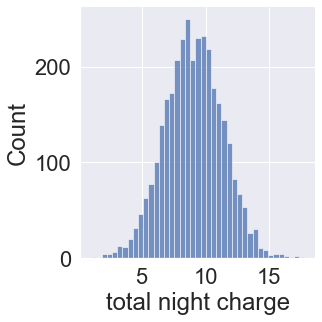

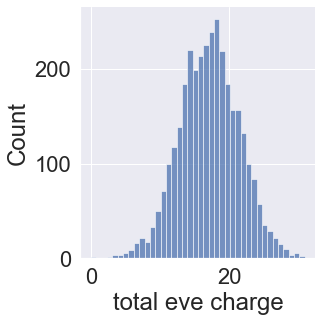

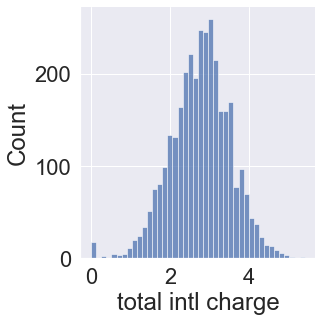

In [38]:
#checking for the distribution of charges

sns.displot(data = df, x = 'total day charge',fill= True);

sns.displot(data = df, x = 'total night charge',fill= True);

sns.displot(data = df, x = 'total eve charge',fill= True);

sns.displot(data = df, x = 'total intl charge',fill= True);

In [39]:
#encoding churn variables
encoder = LabelEncoder()
df['churn'] = encoder.fit_transform(df['churn'])
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [40]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0


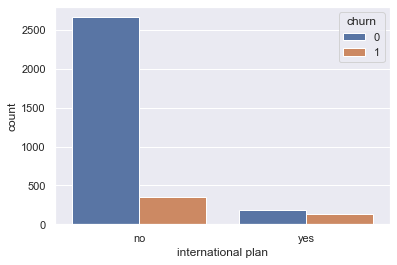

In [41]:
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(x='international plan', hue = 'churn', data=df);

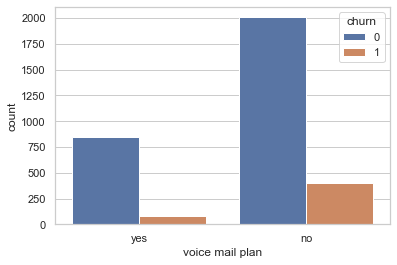

In [42]:
sns.set_theme(style = 'whitegrid')
ax = sns.countplot(x='voice mail plan', hue = 'churn', data=df)

In [ ]:
def numeric_distributions(df, numeric_variable, target_variable):
    """
    Plot the distributions of numeric variables based on the target variable.
    Parameters:
        df (DataFrame): The input DataFrame.
        numeric_variable (str): The name of the numeric variable column.
        target_variable (str): The name of the target variable column.
    """
    # Plot numeric distributions based on the target variable    
    sns.histplot(data=df, x=numeric_variable, hue=target_variable, kde=True)
    # Set the title of the plot
    plt.title('Numeric Variable Distribution')
    # Plot Graph
    plt.show()

In [43]:
 Get the list of categorical columns
categorical_columns = df.select_dtypes(include='object')
categorical_columns.drop('state', axis=1, inplace=True)
fig = plt.figure(figsize = (25, 25))
i = 1
for c in categorical_columns:
    plt.subplot(5, 4, i)
    ax = sns.countplot(data = categorical_columns, x = categorical_columns[c], palette ='Dark2')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

SyntaxError: invalid syntax (<ipython-input-43-3a33faec3e4e>, line 1)